Let's start the clock to time the Python code.

In [1]:
import time
start_time = time.time()

Read the data.

In [2]:
import pandas as pd
train_data = pd.read_csv("/Users/sedacavdaroglu/Desktop/DATS_Final-master/train_housing.csv")
test_data = pd.read_csv("/Users/sedacavdaroglu/Desktop/DATS_Final-master/test_housing.csv")

Let's check the first 10 rows of the data to get an idea.

In [3]:
train_data.head(n=10)

,ms.zoning,lot.frontage,lot.area,street,alley,lot.shape,land.contour,lot.config,land.slope,neighborhood,...,mo.sold,yr.sold,sale.type,sale.condition,saleprice,ln.lot.frontage,ln.lot.area,house.age,yrs.since.remod,has.2nd.floor
0,RL,141.0,31770,Pave,No Alley,IR1,Lvl,Corner,Gtl,NAmes,...,5,2010,Warranty Deed,Normal,215000,4.948760,10.366278,50,50,0
1,RH,80.0,11622,Pave,No Alley,Reg,Lvl,Inside,Gtl,NAmes,...,6,2010,Warranty Deed,Normal,105000,4.382027,9.360655,49,49,0
2,RL,81.0,14267,Pave,No Alley,IR1,Lvl,Corner,Gtl,NAmes,...,6,2010,Warranty Deed,Normal,172000,4.394449,9.565704,52,52,0
3,RL,93.0,11160,Pave,No Alley,Reg,Lvl,Corner,Gtl,NAmes,...,4,2010,Warranty Deed,Normal,244000,4.532599,9.320091,42,42,0
4,RL,78.0,9978,Pave,No Alley,IR1,Lvl,Inside,Gtl,Gilbert,...,6,2010,Warranty Deed,Normal,195500,4.356709,9.208138,12,12,1
5,RL,41.0,4920,Pave,No Alley,Reg,Lvl,Inside,Gtl,StoneBr,...,4,2010,Warranty Deed,Normal,213500,3.713572,8.501064,9,9,0
6,RL,43.0,5005,Pave,No Alley,IR1,HLS,Inside,Gtl,StoneBr,...,1,2010,Warranty Deed,Normal,191500,3.761200,8.518193,18,18,0
7,RL,39.0,5389,Pave,No Alley,IR1,Lvl,Inside,Gtl,StoneBr,...,3,2010,Warranty Deed,Normal,236500,3.663562,8.592115,15,14,0
8,RL,60.0,7500,Pave,No Alley,Reg,Lvl,Inside,Gtl,Gilbert,...,6,2010,Warranty Deed,Normal,189000,4.094345,8.922658,11,11,1
9,RL,75.0,10000,Pave,No Alley,IR1,Lvl,Corner,Gtl,Gilbert,...,4,2010,Warranty Deed,Normal,175900,4.317488,9.210340,17,16,1


Let's visualize the relationship between selling price and other numerical variables with a heatmap.

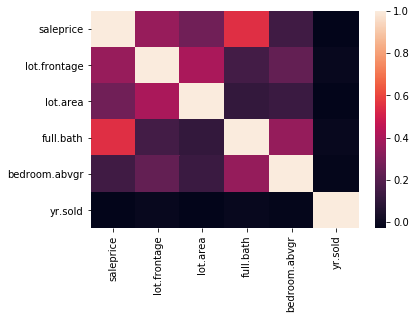

In [4]:
num_data = train_data[['saleprice','lot.frontage','lot.area','full.bath','bedroom.abvgr','yr.sold']]
import seaborn as sns
%matplotlib inline
# calculate the correlation matrix
corr = num_data.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Now, let's do some regression analysis.

In [5]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
import numpy as np

y=num_data['saleprice']
X=num_data.drop('saleprice',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Scale the data
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

#do the prediction with Lasso Regression
lasso_reg=LassoCV(alphas = 10**(np.linspace(-2, 10, num=100))).fit(X_test, y_test)
print(lasso_reg.coef_)

coef = pd.Series(lasso_reg.coef_, index = X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")


[ 19627.81732177   5813.4115854   37233.08427629 -10049.36969879
   1107.56454352]
Lasso picked 5 variables and eliminated the other 0 variables


Let's check the coefficients to see which parameters lasso picked.

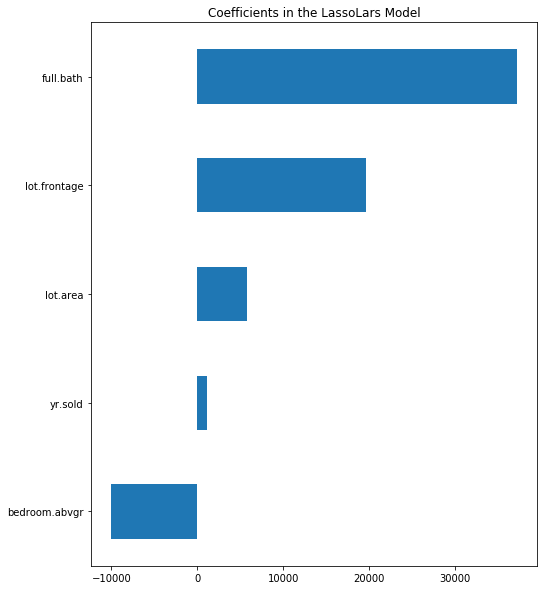

In [6]:
import matplotlib 
import matplotlib.pyplot as plt
imp_coef = pd.concat([coef.sort_values().head(5),
                     coef.sort_values().tail(0)])
    
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the LassoLars Model")

Let's try the machine learning scikitlearn caret to do some simple knn. Let's pick a better dataset for classification first.

In [7]:
from sklearn import datasets
iris = datasets.load_iris()
#convert into data frame
df =  pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

Split the data into training and test sets.

In [8]:
y=df['target']
X=df.drop('target',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Let's do the knn with 10 cross validations.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# instantiate learning model with auto option (picks the best algorithm for knn)
knn = KNeighborsClassifier(algorithm='auto')

#Scale the data 
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

# fit the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

Let's check the accuracies.

In [10]:
# evaluate accuracy
print(accuracy_score(y_test, pred))

cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')

0.98


NameError: name 'cross_val_score' is not defined

How long does this all take?

In [ ]:
end_time = time.time()
print(end_time-start_time)